# I will be implementing neural network for classification of mushrooms i.e. if they are edible(e) or poisonous(p). Dataset used is UCI Mushroom data ([mushroom data](https://archive.ics.uci.edu/dataset/73/mushroom)).


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### one hot encoding the predictor values and doing the train test split

In [43]:
from sklearn.model_selection import train_test_split

df['class'] = df['class'].replace({'p': True, 'e': False})

# Separate the target column and predictors
target = df['class']
predictors = df.drop(columns=['class'])

# One-hot encode predictors 
predictors = pd.get_dummies(predictors)

# Concatenate the target column back to the encoded predictors
df_encoded = pd.concat([target, predictors], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns=['class']),
                                                    df_encoded['class'],
                                                    test_size=0.3,
                                                    random_state=42)


#### checking the number of occurences in data of the two classes

In [54]:
class_counts = target.value_counts()

print("Number of occurrences of each class:")
print(class_counts)

Number of occurrences of each class:
class
False    4208
True     3916
Name: count, dtype: int64


#### values of the two classes almost similar so our dataset is balanced. No need of augmentation.

In [44]:
df_encoded.describe()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,4208,7672,8120,4972,7296,8092,4468,5804,8120,5568,...,6876,4084,6412,4976,5976,7292,7832,6980,7756,7932


#### checking for any null values

In [45]:
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


#### therefore no missing values

In [50]:
print(df_encoded.shape)
print(X_train.shape)
print(X_test.shape)

(8124, 118)
(5686, 117)
(2438, 117)


#### Training the model

In [47]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (50,10), activation = "logistic", solver = "lbfgs")

# Train the model
model.fit(X_train, y_train)


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 10),
              solver='lbfgs')

In [48]:
from sklearn.metrics import accuracy_score

# Predict the labels for test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


#### confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1257    0]
 [   0 1181]]


#### calculating precision and recall

In [51]:
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 1.0


#### classification report

In [53]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1257
        True       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#### Model architecture overview

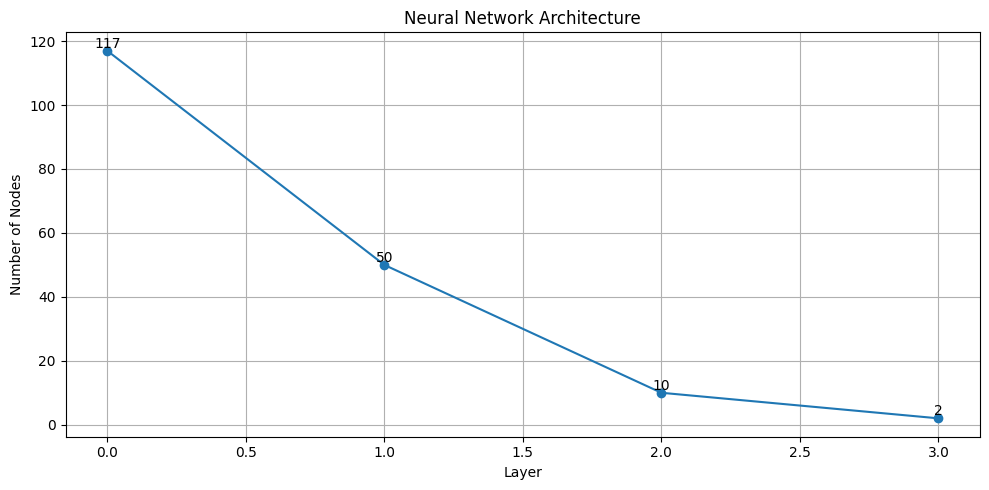

In [38]:
import matplotlib.pyplot as plt

# Get the number of nodes in each layer
layer_sizes = [X_train.shape[1]] + list(model.hidden_layer_sizes) + [len(model.classes_)]

# Create a new figure
plt.figure(figsize=(10, 5))

# Plot the architecture
plt.title('Neural Network Architecture')
plt.xlabel('Layer')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.plot(layer_sizes, marker='o', linestyle='-')

# Add labels for each layer
for i, size in enumerate(layer_sizes):
    plt.text(i, size, str(size), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


#### input layer = 117
#### hidden layer1 = 50
#### hidden layer2 = 10
#### output layer = 2 classes